In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


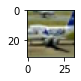

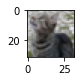

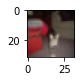

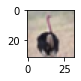

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test=X_test/255
n_classes = 10

In [ ]:
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

In [ ]:
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=4, validation_data=(X_test, Y_test))

Epoch 1/4
391/391 [==============================] - 493s 1s/step - loss: 1.2247 - accuracy: 0.5611 - val_loss: 0.9749 - val_accuracy: 0.6649
Epoch 2/4
391/391 [==============================] - 494s 1s/step - loss: 0.9891 - accuracy: 0.6535 - val_loss: 0.8808 - val_accuracy: 0.6958
Epoch 3/4
391/391 [==============================] - 493s 1s/step - loss: 0.8462 - accuracy: 0.7040 - val_loss: 0.8102 - val_accuracy: 0.7182
Epoch 4/4
391/391 [==============================] - 491s 1s/step - loss: 0.7454 - accuracy: 0.7381 - val_loss: 0.7246 - val_accuracy: 0.7475


In [ ]:
classes = range(0,10)
names = ['airplane','automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

In [ ]:
class_labels = dict(zip(classes, names))
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 529ms/step


In [ ]:
print (predictions)

[[2.05735691e-04 5.18818069e-06 2.28119362e-02 1.45644136e-02
  3.74278456e-01 1.43981308e-01 8.04528885e-04 4.43293452e-01
  3.01554628e-05 2.47896478e-05]
 [1.52813084e-03 5.15402178e-04 4.93756756e-02 2.73811996e-01
  1.18616931e-01 3.65928471e-01 5.81272915e-02 1.23758845e-01
  5.27062593e-03 3.06667737e-03]
 [4.11339221e-04 7.00529490e-04 3.22939083e-02 4.02623750e-02
  4.07959707e-03 2.57238839e-02 8.91009092e-01 3.15093389e-03
  1.70765328e-03 6.60768710e-04]
 [6.82393693e-06 1.22714491e-05 1.79130130e-03 7.86585212e-01
  6.68666558e-03 2.22759228e-02 1.82149559e-01 2.55501393e-04
  1.46451042e-04 9.02702886e-05]
 [7.41549084e-05 9.82526958e-01 1.16777628e-07 2.12796778e-07
  7.85878296e-09 2.44822530e-07 6.68804745e-08 7.38109804e-08
  5.93808945e-04 1.68044288e-02]
 [3.74889205e-04 9.87460494e-01 9.42141014e-06 1.28581651e-05
  7.67452320e-07 4.54220935e-06 2.89568179e-05 5.82496057e-07
  6.32564630e-03 5.78181678e-03]
 [4.42465283e-02 2.59687682e-03 1.61416963e-01 3.91125530e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0000001
0.99999994
1.0000001
1.0
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 5 6 3 1 1 3 6 8]


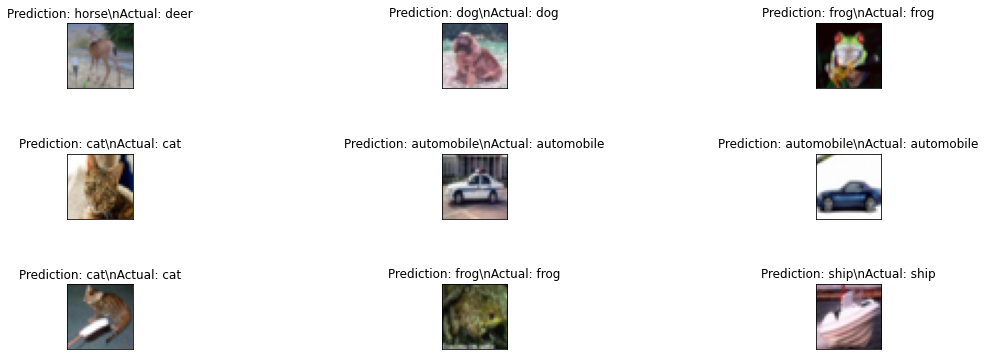

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    axs[i].imshow(img)
plt.show()